In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:/Datasets/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
X = data.iloc[:, [3,4]].values

## Using the Dendrogram to find the optimal number of clusters

## Centroid Method

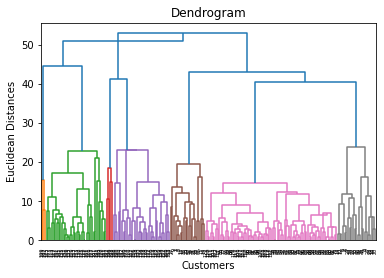

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram1 = sch.dendrogram(sch.linkage(X, method = 'centroid'))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

## Average Method

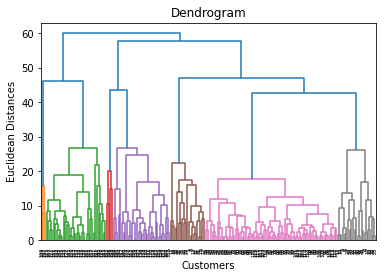

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram2 = sch.dendrogram(sch.linkage(X, method = 'average'))
plt.title("Dendrogram")
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### Training the Hierarchical Clustering model on the dataset

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualizing the dataset

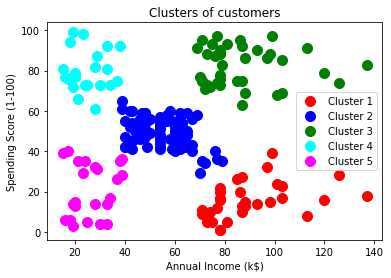

In [11]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c='red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c='green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3,0], X[y_hc == 3,1], s = 100, c='cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], s = 100, c='magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

---------------------------------------------------------------------------------------------

# K-Means

C:\Users\kmirc\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


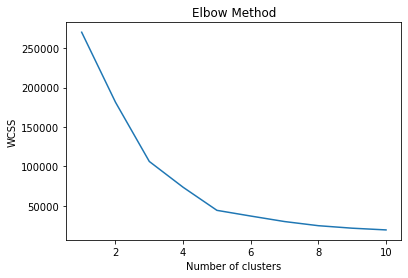

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

WCSS is the sum if squared distance bw each point and the centroid of the circle.

In [13]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

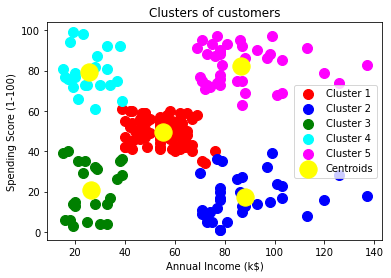

In [14]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c='green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c='cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c='magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()